# Introduction of Pandas

---

Welcome to the Pandas workshop! Today, we're going to use this JupyterLab interface to demonstrate some basic operation of **Pandas** and how to generate some nice figures from these DataFrames.

**[Pandas](https://pandas.pydata.org/docs/index.html)** is a powerful data analysis library in Python, the features includes:

- Using a _DataFrame_ object for data manipulation.
- Support reading and writing data with various format (csv, excel, SQL and HDF5)
- Highly optimized for performance, with critical code paths written in Cython or C


## Today's topics:

- [Introduction of the _Series_ and _DataFrame_ object](#introduction-of-the-series-and-dataframe-object)
    - [Creating a _Series_ by passing a list of values](#creating-a-series-by-passing-a-list-of-values)
    - [Creating a _DataFrame_ by passing a nested list with column names](#creating-a-dataframe-by-passing-a-nested-list-with-column-names)
    - [Creating a _DataFrame_ by passing a dictionary](#creating-a-dataframe-by-passing-a-dictionary)
    - [Some basic manipulation of DataFrame object](#some-basic-manipulation-of-dataframe-object)
- [Read and write with different data formats](#read-and-write-with-different-data-formats)
    - [](#)
- [Plot with `seaborn` and `matplotlib`](#plot-with-seaborn-and-matplotlib)
    - [Barplot](#barplot)
    - [Boxplot](#boxplot)
    - [Heatmap](#heatmap)

# How to use JupyterLab

---

New to JupyterLab? Don't worry, here I also provide some tips on how to use this interface.

**JupyterLab** is the latest web-based development environment. It provides an **interactive** platform, which is great for learning and debugging! It's quite similar to _R Markdown_ (both have these code chunks, but we called it _cell_ in **JupyterLab**) so you can run the codes step by step and see all the outputs after running.

Here are some basic operations (somewhat similar to the editor `vim`):

- Press `Enter` to edit the current cell.
- After editing the code. Press `ctrl + Enter` to run the cell and stay on current cell. (Or using `shift + Enter` to run the cell and move to next cell)
- Press `ESC` to leave from editing mode and switch to the command mode.
- In command mode, Press `b` to insert a cell below.
- In command mode, Press `a` to insert a cell above.
- In command mode, Press `dd` to remove the current cell.
- `ctrl + z` to undo and `ctrl + shift + z` to redo.
- Click on the `Interrupt the kernel`<img src="src/stop.png" alt="" title="Stop" /> on the upper panel to force stop when a cell stuck during running.
- Click on the `Restart the kernel`<img src="src/restart.png" alt="" title="Stop" /> on the upper panel if something go wrong seriously or you want to refresh the entire environment.

There is one more feature I'd like to share:

- Press `shift + tab` inside a function. This will show you the description of that function.

It's a very convenient feature when you trying to use a function that you don't know well.

You can use the following cells to practice a bit:


In [1]:
print("practice cell 1")

practice cell 1


In [2]:
print("practice cell 2")

practice cell 2


---

OK, let go to today's topic - **Pandas**!

First of all, please import the `pandas` library. This may take a while...


In [2]:
import pandas as pd

## Introduction of the _Series_ and _DataFrame_ object


### Creating a _Series_ by passing a list of values:

Series is the basic unit of Pandas. It is a one-dimensional _ndarray_ with axis labels.


In [2]:
s = pd.Series([1, 2, 3, 4])

Note that in JupyterLab, you can view the content of a variable by running it directly. (You still have to use _print_ to view the results in a loop)


In [3]:
s

0    1
1    2
2    3
3    4
dtype: int64

### Creating a _DataFrame_ by passing a nested list with column names:

_DataFrame_ is the most frequently used object in Pandas. It is just like the _DataFrame_ in R.


In [4]:
df = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8]], columns=["A", "B", "C", "D"])

In [5]:
df

,A,B,C,D
0,1,2,3,4
1,5,6,7,8


### Creating a _DataFrame_ by passing a dictionary:

In addition to _list_, we can also create a _DataFrame_ by converting a _dict_.


In [9]:
d = {
    "Name": ["Alice", "Bob", "Charlie", "Dave", "Eve", "Frank", "Grace"],
    "Gender": ["F", "M", "M", "M", "F", "M", "F"],
    "Age": [20, 40, 32, 31, 25, 20, 40],
}

In [10]:
d

{'Name': ['Alice', 'Bob', 'Charlie', 'Dave', 'Eve', 'Frank', 'Grace'],
 'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F'],
 'Age': [20, 40, 32, 31, 25, 20, 40]}

In [11]:
df = pd.DataFrame(d)

In [12]:
df

,Name,Gender,Age
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


Another way to convert a _dict_ to _DataFrame_.


In [13]:
df2 = pd.DataFrame.from_dict(d)

In [14]:
df2

,Name,Gender,Age
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


In this function, you can also set the argument `orient="index"` to change the orientation of the loaded dict.


In [15]:
df3 = pd.DataFrame.from_dict(d, orient="index")

In [16]:
df3

,0,1,2,3,4,5,6
Name,Alice,Bob,Charlie,Dave,Eve,Frank,Grace
Gender,F,M,M,M,F,M,F
Age,20,40,32,31,25,20,40


Transpose the orientation back by `df.T`


In [17]:
df4 = df3.T

In [18]:
df4

,Name,Gender,Age
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


#### Problem - load from dictionary

In the example above, the dictionary are arrange by 3 keys - Name, Gender and Age, with each key contains a list with 7 items.
If our dictionary uses personal id as keys, can you still build a _DataFrame_ resemble to the one above?


In [1]:
d = {
    "id_1": ["Alice", "F", "20"],
    "id_2": ["Bob", "M", "40"],
    "id_3": ["Charlie", "M", "32"],
    "id_4": ["Dave", "M", "31"],
    "id_5": ["Eve", "F", "25"],
    "id_6": ["Frank", "M", "20"],
    "id_7": ["Grace", "F", "40"],
}
d

{'id_1': ['Alice', 'F', '20'],
 'id_2': ['Bob', 'M', '40'],
 'id_3': ['Charlie', 'M', '32'],
 'id_4': ['Dave', 'M', '31'],
 'id_5': ['Eve', 'F', '25'],
 'id_6': ['Frank', 'M', '20'],
 'id_7': ['Grace', 'F', '40']}

In [7]:
# Please write and test your codes in this cell

,0,1,2
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


### Some basic manipulation of DataFrame object


#### Select data from _DataFrame_ by `df[col_name]`

When `col_name` exist, `df[col_name]` will help you retrieve the content of that column.


In [86]:
d = {
    "Name": ["Alice", "Bob", "Charlie", "Dave", "Eve", "Frank", "Grace"],
    "Gender": ["F", "M", "M", "M", "F", "M", "F"],
    "Age": [20, 40, 32, 31, 25, 20, 40],
}
df = pd.DataFrame(d)
df

,Name,Gender,Age
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


In [87]:
df["Age"]

0    20
1    40
2    32
3    31
4    25
5    20
6    40
Name: Age, dtype: int64

#### Add additional column

You also can add a new column by `df[col_name]`. Just give it a new `col_name` with a list-like object.


In [88]:
df["State"] = ["Florida", "California", "Kentucky", "Colorado", "New York", "California", "Texas"]

In [89]:
df

,Name,Gender,Age,State
0,Alice,F,20,Florida
1,Bob,M,40,California
2,Charlie,M,32,Kentucky
3,Dave,M,31,Colorado
4,Eve,F,25,New York
5,Frank,M,20,California
6,Grace,F,40,Texas


#### Get values from index and column

As you can see from the above DataFrame, the indices are numbers from 0 to 6 and columns are "Name", "Gender", "Age" and "State".
You can use df.index and df.columns to retrieve the values from index and column, respectively.


In [90]:
df.index

RangeIndex(start=0, stop=7, step=1)

In [91]:
# We can try to loop over this range object and it will be exactly the same as we saw in the index of the DataFrame
for idx in df.index:
    print(idx)

0
1
2
3
4
5
6


In [92]:
df.columns

Index(['Name', 'Gender', 'Age', 'State'], dtype='object')

By using the skills we learned above, try to replace the index column with the column _Name_.

First, We can use the function `df.index` to retrieve the index column.


In [93]:
df.index

RangeIndex(start=0, stop=7, step=1)

In [94]:
df.index = df["Name"]

In [95]:
df

,Name,Gender,Age,State
Name,,,,
Alice,Alice,F,20,Florida
Bob,Bob,M,40,California
Charlie,Charlie,M,32,Kentucky
Dave,Dave,M,31,Colorado
Eve,Eve,F,25,New York
Frank,Frank,M,20,California
Grace,Grace,F,40,Texas


We can now delete the _Name_ column since it is already being set as the index. Remember to assign the modified `df` to a variable. (here we overwrite the original `df`) otherwise your modification would not being saved.


In [96]:
df = df.drop("Name", axis=1)
df_backup = df.copy()

In [97]:
df

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York
Frank,M,20,California
Grace,F,40,Texas


#### Problem - change on existing columns

Say after a year, we need to change the column "Age" by adding 1 to all of them. Can you apply this change on the DataFrame?


In [54]:
# Please write and test your codes in this cell

Name
Alice      21
Bob        41
Charlie    33
Dave       32
Eve        26
Frank      21
Grace      41
Name: Age, dtype: int64

#### Select data from _DataFrame_ by `df.loc` and `df.iloc`

`df[col_name]` can retrieve data by column. But what if we want to get the data from row? We can use `df.loc` or `df.iloc` to do that.

Usage:

- `df.loc[row_name]`
- `df.iloc[row_index]`

Try to use `df.loc` and `df.iloc` to extract all the information from **Dave**.


In [136]:
# Restore to the original `df`
df = df_backup.copy()

In [100]:
# loc use value as key to retrieve data
df.loc["Dave"]

Gender           M
Age             31
State     Colorado
Name: Dave, dtype: object

In [102]:
# iloc use index as key to retrieve data. Dave is the 4th item which the index is 3.
df.iloc[3]

Gender           M
Age             31
State     Colorado
Name: Dave, dtype: object

We can also extract multiple rows by passing a list or a slice indeces.


In [106]:
df.loc[["Bob", "Charlie", "Dave", "Eve"]]

,Gender,Age,State
Name,,,
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York


In [107]:
# Slice expression only available in iloc
df.iloc[1:5]

,Gender,Age,State
Name,,,
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York


Note that you can also use `df.loc[:, col_name]` and `df.iloc[:, col_index]` to get the entire column, just like `df[col_name]`.

Below is an example that use `df.loc` to extract the _Gender_ column.


In [108]:
df.loc[:, "Gender"]

Name
Alice      F
Bob        M
Charlie    M
Dave       M
Eve        F
Frank      M
Grace      F
Name: Gender, dtype: object

You might notice that the behavior of `df.loc` is somewhat similar to `df[col_name]`. Indeed, the results would be the same, but the processing logic are slightly different. Let's take a look at the example below.

Now we want to get the _State_ where Dave lived. Try to use `df.loc`, `df.iloc` and `df[col_name]` to do that.


In [119]:
# df.loc: specify the row_name and col_name directly
df.loc["Dave", "State"]

'Colorado'

In [118]:
# df.iloc: specify the row_index and col_index directly
df.iloc[3, 2]

'Colorado'

In [121]:
# Using df['State'] to get a Series of the "State" column, and then use "Dave" as another index to get the data from the Series.
df["State"]["Dave"]

'Colorado'

#### Problem - change on existing columns

Dave got a new job and move to Arizona. Can you apply this change to the DataFrame?


In [129]:
# Please write and test your codes in this cell


Here we breifly summarize the usage of `df.loc` and `df.iloc`:

- `df.loc[row_name(, col_name)]`
- `df.iloc[row_index(, col_index)]`


#### Subset the **DataFrame**

Let's try to find people that the age is smaller than 30.


In [137]:
# Restore to the original `df`
df = df_backup.copy()

In [138]:
df["Age"] < 30

Name
Alice       True
Bob        False
Charlie    False
Dave       False
Eve         True
Frank       True
Grace      False
Name: Age, dtype: bool

Using the method above we got a boolean Series. So we just simply use it as a boolean mask to apply on the `df`


In [139]:
df[df["Age"] < 30]

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Eve,F,25,New York
Frank,M,20,California


Try to use `df.loc` to extract the _State_ these young guys lived.


In [140]:
df.loc[df["Age"] < 30, "State"]

Name
Alice       Florida
Eve        New York
Frank    California
Name: State, dtype: object

#### Sort DataFrame

`df.sort_values()` can sort by the values of a column. Please save the sorted DataFrame to another object `df_sort_age`, we'll use it later.


In [141]:
# Restore to the original `df`
df = df_backup.copy()

In [142]:
df_sort_age = df.sort_values("Age")
df_sort_age

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Frank,M,20,California
Eve,F,25,New York
Dave,M,31,Colorado
Charlie,M,32,Kentucky
Bob,M,40,California
Grace,F,40,Texas


We can also sort by multiple values by input a list instead of a single string.

The example belowsort the `df` by _State_ first and then sort by _Age_. (_Age_ is primary and _State_ is secondary)


In [143]:
df.sort_values(["Age", "State"])

,Gender,Age,State
Name,,,
Frank,M,20,California
Alice,F,20,Florida
Eve,F,25,New York
Dave,M,31,Colorado
Charlie,M,32,Kentucky
Bob,M,40,California
Grace,F,40,Texas


In [145]:
# You can connected several `sort_values()` function toghther.
df.sort_values("State").sort_values("Age")

,Gender,Age,State
Name,,,
Frank,M,20,California
Alice,F,20,Florida
Eve,F,25,New York
Dave,M,31,Colorado
Charlie,M,32,Kentucky
Bob,M,40,California
Grace,F,40,Texas


We can also sort the _DataFrame_ by index. Here we'll use the `df_sort_age` as an example. (since it is no longer ordered by index)


In [148]:
df_sort_age

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Frank,M,20,California
Eve,F,25,New York
Dave,M,31,Colorado
Charlie,M,32,Kentucky
Bob,M,40,California
Grace,F,40,Texas


In [149]:
df_sort_age.sort_index()

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York
Frank,M,20,California
Grace,F,40,Texas


#### Other operations

Here are some other features that I also oftenly use:

- `df.shape` will return the dimension of the `df`


In [186]:
df

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York
Frank,M,20,California
Grace,F,40,Texas


In [151]:
df.shape

(7, 3)

- `df.to_dict` will return a dictionary converted from the `df`


In [152]:
df.to_dict()

{'Gender': {'Alice': 'F',
  'Bob': 'M',
  'Charlie': 'M',
  'Dave': 'M',
  'Eve': 'F',
  'Frank': 'M',
  'Grace': 'F'},
 'Age': {'Alice': 20,
  'Bob': 40,
  'Charlie': 32,
  'Dave': 31,
  'Eve': 25,
  'Frank': 20,
  'Grace': 40},
 'State': {'Alice': 'Florida',
  'Bob': 'California',
  'Charlie': 'Kentucky',
  'Dave': 'Colorado',
  'Eve': 'New York',
  'Frank': 'California',
  'Grace': 'Texas'}}

- `df.values` will return an **numpy** array converted from the `df`

**numpy** is the fundamental library for scientific computing in Python.
It provides a lot of high-level mathematical functions to operate arrays and matrices.
**Pandas** uses numpy as it backend and develop to a data science specific package.

In [153]:
df.values

array([['F', 20, 'Florida'],
       ['M', 40, 'California'],
       ['M', 32, 'Kentucky'],
       ['M', 31, 'Colorado'],
       ['F', 25, 'New York'],
       ['M', 20, 'California'],
       ['F', 40, 'Texas']], dtype=object)

- `s.tolist()` will convert a Series to a list


In [154]:
df["State"].tolist()

['Florida',
 'California',
 'Kentucky',
 'Colorado',
 'New York',
 'California',
 'Texas']

- `df.mean()` will return the mean of the `df`, note that you have select only the **numeric** columns if there are **non-numeric** values in your _DataFrame_. (in our `df` only column 'Age' is numeric)


In [155]:
df["Age"].mean()

29.714285714285715

- `df.std()` will return the standard deviation of the `df`, specify the **numeric** columns if there are **non-numeric** values in you _DataFrame_.


In [156]:
df["Age"].std()

8.459989868281674

- `df.median()` will return the median of the `df`, specify the **numeric** columns if there are **non-numeric** values in you _DataFrame_.


In [157]:
df["Age"].median()

31.0

- `df.describe()` will return a table of basic statistic description of the _DataFrame_


In [158]:
df.describe()

,Age
count,7.000000
mean,29.714286
std,8.459990
min,20.000000
25%,22.500000
50%,31.000000
75%,36.000000
max,40.000000


## Read and write with different data formats


### Import the csv (Comma-separated values) file

By default the function `pd.read_csv()` load files with csv format. The default value of the argument `sep`, which control the delimiter to use, have been set as '**,**' (comma)


In [2]:
df_samp_1 = pd.read_csv("data/sample_1.csv")
df_samp_1

,Gene,TPM
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


### Import the tsv (Tab-separated values) file


When directly load a tsv file through `pd.read_csv()` would cause a mis-organized output.


In [3]:
df_samp_2 = pd.read_csv("data/sample_2.tsv")
df_samp_2

,Gene\tTPM
0,YBL005W-A\t12.4551
1,ATP16\t11.5831
2,COX13\t11.3632
3,ERO1\t11.7604
4,KSH1\t11.3477
5,HDA1\t7.82998
6,COX8\t10.488
7,YLR154W-F\t11.2489
8,NHP6B\t12.1082
9,RAD28\t8.6147


Specifying the argument `sep="\t"` will fix the tsv loading problem.


In [4]:
df_samp_2 = pd.read_csv("data/sample_2.tsv", sep="\t")
df_samp_2

,Gene,TPM
0,YBL005W-A,12.45510
1,ATP16,11.58310
2,COX13,11.36320
3,ERO1,11.76040
4,KSH1,11.34770
5,HDA1,7.82998
6,COX8,10.48800
7,YLR154W-F,11.24890
8,NHP6B,12.10820
9,RAD28,8.61470


### Import files without header

By default the first line would be set as header. But some tables are lack of header and the first row would be set as header accidentally.


In [5]:
df_samp_3 = pd.read_csv("data/sample_3.csv")
df_samp_3

,PMP2,13.2347
0,ARK1,8.98824
1,SNC1,11.18560
2,SWI1,8.88728
3,YDR261W-B,12.50640
4,COX8,10.14050
5,YLR154W-F,10.63030
6,NHP6B,11.86390
7,RAD28,8.05457
8,RTC1,7.07700
9,PUP2,12.57740


In order to avoid the behavior, we can set the argument `header=None`. The header would become a list of indeces \[0, 1, ...\].


In [6]:
df_samp_3 = pd.read_csv("data/sample_3.csv", header=None)
df_samp_3

,0,1
0,PMP2,13.23470
1,ARK1,8.98824
2,SNC1,11.18560
3,SWI1,8.88728
4,YDR261W-B,12.50640
5,COX8,10.14050
6,YLR154W-F,10.63030
7,NHP6B,11.86390
8,RAD28,8.05457
9,RTC1,7.07700


After the **DataFrame** is created, we can re-assign the column name directly by `df.columns = list_like_object`.


In [7]:
df_samp_3.columns = ["Gene", "TPM"]

In [8]:
df_samp_3

,Gene,TPM
0,PMP2,13.23470
1,ARK1,8.98824
2,SNC1,11.18560
3,SWI1,8.88728
4,YDR261W-B,12.50640
5,COX8,10.14050
6,YLR154W-F,10.63030
7,NHP6B,11.86390
8,RAD28,8.05457
9,RTC1,7.07700


In [9]:
df_samp_3 = pd.read_csv("data/sample_3.csv", header=None, names=["Gene", "TPM"])
df_samp_3

,Gene,TPM
0,PMP2,13.23470
1,ARK1,8.98824
2,SNC1,11.18560
3,SWI1,8.88728
4,YDR261W-B,12.50640
5,COX8,10.14050
6,YLR154W-F,10.63030
7,NHP6B,11.86390
8,RAD28,8.05457
9,RTC1,7.07700


### Ignore the comments in files

Loading a file with comment would also cause problem. By default the first line would be set as header.


In [10]:
df_samp_4 = pd.read_csv("data/sample_4.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


Specifying the argument **_comment_** as '#' to indicate the lines started with # should not be parsed


In [11]:
df_samp_4 = pd.read_csv("data/sample_4.csv", comment="#")
df_samp_4

,Gene,TPM
0,PMP2,13.11380
1,ARK1,8.80636
2,YDR261W-B,12.35750
3,ERO1,11.50890
4,EGT2,11.80380
5,EGT2,11.80380
6,YCL002C,8.32765
7,SNC1,11.10890
8,ATP16,11.00450
9,SWI1,8.70331


### Write a DataFrame to file

Writing a **DataFrame** out to a file is also simple, you can do this by `df.to_csv()` Here, let's try to save the df_samp_4 we got above to a new file.


In [12]:
df_samp_4.to_csv("new_file.csv")

By default the index column will also be output. If you don't want the index column in your csv output you can specify `index=False`.


In [13]:
df_samp_4.to_csv("new_file2.csv", index=False)

If you prefer to save it in tsv format, you can specify `sep="\t"` to get one.


In [14]:
df_samp_4.to_csv("new_file.tsv", sep="\t", index=False)

In [15]:
# Save a backup for these 4 DataFrame objects
df_samp_1_backup, df_samp_2_backup, df_samp_3_backup, df_samp_4_backup = df_samp_1.copy(), df_samp_2.copy(), df_samp_3.copy(), df_samp_4.copy()

#### Problem - build a DataFrame from the BLAST results

In this problem we'll practice how to build a DataFrame from the BLASTn results we got this Wednesday.

Please load the BLASTn results from "../Bioinformatics/BLAST/yeastORF-vs-CglabrataORF.BLASTN.tab" and use the list `header` below to assign the header.
The details of the header abbreviation can be found here:

<img src="src/blastn_fmt6_headers.jpg" alt="" title="Stop" />

After load the DataFrame, try to sort it by using *qseqid* as primary key and *bitscore* as secondary key. We want the entries with **higher bitscore** to show up first. (sort descendingly)

hint: use `shift + tab` or [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) to see what option is available to change the sorting order.

In [5]:
header = ["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen", "qstart", "qend", "sstart", "send", "evalue", "bitscore"]

In [ ]:
# Please write and test your codes in this cell


In [21]:
# Please change the "your_df_name" to the variable that you used to save the DataFrame, we'll use it later
blastn_df_backup = your_df_name.copy()

## Advanced usage of DataFrame object

In this chapter, we'll use a truncated gene-expression profile to demonstrate some advanced usages of Pandas.


### Change column names

We have learned using [`df.columns` to re-assign the column names](#Import-files-without-header). However, it will change the entire header.

If you only want to change a part of the column names, you can use the function `df.rename()` with argument `axis=1` (the default `axis=0` would change the row names (index column)).

You can assign the result to a new variable (`new_df` in this case) or specify the argument `inplace=True` to directly modify the original object.


In [16]:
df_samp_1 = df_samp_1_backup.copy()
df_samp_1

,Gene,TPM
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


In [17]:
new_df = df_samp_1.rename({'Gene': 'Name'}, axis=1)
new_df

,Name,TPM
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


In [18]:
df_samp_1.rename({"TPM": "TPM_s1"}, axis=1, inplace=True)
df_samp_1

,Gene,TPM_s1
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


### Merge the **DataFrames**

We can merge 2 _Dataframe_ objects by the functions `pd.merge(df1, df2)` or `df1.merge(df2)`.

There are several important arguments can be used to control the merging behavior:

- **_how_**: type of merge to be performed. Default is "inner", which use the intersection of the keys from both frames.

- **_on_**: column or index level names to join on. These must be found in both DataFrames.


In [19]:
# Here are the top 5 entries in DataFrame `df_samp_2`
df_samp_2.iloc[:5]

,Gene,TPM
0,YBL005W-A,12.4551
1,ATP16,11.5831
2,COX13,11.3632
3,ERO1,11.7604
4,KSH1,11.3477


In [20]:
# Here are the top 5 entries in DataFrame `df_samp_3`
df_samp_3.iloc[:5]

,Gene,TPM
0,PMP2,13.23470
1,ARK1,8.98824
2,SNC1,11.18560
3,SWI1,8.88728
4,YDR261W-B,12.50640


In [21]:
pd.merge(df_samp_2, df_samp_3, on="Gene")

,Gene,TPM_x,TPM_y
0,YBL005W-A,12.45510,12.21290
1,ATP16,11.58310,11.23210
2,COX13,11.36320,10.93550
3,ERO1,11.76040,11.60360
4,KSH1,11.34770,11.19450
5,HDA1,7.82998,7.62966
6,COX8,10.48800,10.14050
7,YLR154W-F,11.24890,10.63030
8,NHP6B,12.10820,11.86390
9,RAD28,8.61470,8.05457


In [22]:
# An equivalent expression
df_samp_2.merge(df_samp_3, how="outer", on="Gene")

,Gene,TPM_x,TPM_y
0,YBL005W-A,12.45510,12.21290
1,ATP16,11.58310,11.23210
2,COX13,11.36320,10.93550
3,ERO1,11.76040,11.60360
4,KSH1,11.34770,11.19450
5,HDA1,7.82998,7.62966
6,COX8,10.48800,10.14050
7,YLR154W-F,11.24890,10.63030
8,NHP6B,12.10820,11.86390
9,RAD28,8.61470,8.05457


You can merge the 2 _DataFrames_ even with different column name.

Here we use the previous DataFrame that we renamed the column "Gene" to "Name" and use `how="outer"` to see what is different.

In [23]:
new_df

,Name,TPM
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


In [24]:
pd.merge(df_samp_2, new_df, left_on="Gene", right_on="Name", how="outer")

,Gene,TPM_x,Name,TPM_y
0,YBL005W-A,12.45510,NaN,NaN
1,ATP16,11.58310,ATP16,11.52210
2,COX13,11.36320,COX13,11.31180
3,ERO1,11.76040,ERO1,11.77450
4,KSH1,11.34770,KSH1,11.40420
5,HDA1,7.82998,HDA1,7.98176
6,COX8,10.48800,NaN,NaN
7,YLR154W-F,11.24890,YLR154W-F,11.53480
8,NHP6B,12.10820,NHP6B,12.23650
9,RAD28,8.61470,RAD28,8.87234


An example of merge several **DataFrames** by a for loop:


In [25]:
# First we use a new variable `combined_df` and save df_samp_1 as the initial DataFrame
combined_df = df_samp_1

In [26]:
for df in [df_samp_2, df_samp_3, df_samp_4]:
    combined_df = combined_df.merge(df, how="outer", on="Gene")

In [27]:
combined_df

,Gene,TPM_s1,TPM_x,TPM_y,TPM
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


In [28]:
combined_df.columns = ["Gene", "sample1", "sample2", "sample3", "sample4"]
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


### Refine DataFrame


#### Deal with duplicated data

You might notice that a gene _'EGT2'_ have many duplicates. We can use the function `df.drop_duplicates()` to remove them.

Like what we did above, you can assign the result to a new variable or specify `inplace=True` to directly modify the object. Here we use **_inplace_** to change the `combined_df`.


In [29]:
combined_df.drop_duplicates(inplace=True)
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


- Tip: Duplicated rows removed by `df.drop_duplicates()` sometimes result in discontinued index.
We can fix this by df.reset_index(). (the argument `drop=True` indicates we would like to drop the old index)

In [30]:
combined_df.reset_index(drop=True, inplace=True)
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


In [31]:
# Backup the DataFrame
combined_df_backup = combined_df.copy()

#### Deal with missing data _NaN_

It seems like a lot of NaN in `combined_df`. We can use the function `df.dropna()` to remove them.

Note that this will remove the entire row even contains only one NaN. (which is not what we want, so DO NOT re-assign or use **_inplace_** to modify the `combined_df`)


In [32]:
df_dropna = combined_df.dropna()
df_dropna

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
7,RAD28,8.87234,8.61470,8.05457,7.66417
9,KRE1,11.92530,11.87340,11.72780,11.62600
10,ERD2,9.86781,9.73894,9.46022,9.22987
12,YBR255C-A,9.06145,8.79874,8.23745,7.60011
16,ATP16,11.52210,11.58310,11.23210,11.00450
18,ERO1,11.77450,11.76040,11.60360,11.50890


Instead of remove the rows containing NaN, `df.fillna()` help you to fill the NaN values with specified values or methods.

In the following case, we fill the NaN with 0.

- **Note: this might not be the best way to deal with missing data. Therefore, DO NOT re-assign or use the \***inplace**\* to modify the `combined_df`.**


In [33]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


In [34]:
combined_df.fillna(0)

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,0.00000,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,0.00000
6,NHP6B,12.23650,12.10820,11.86390,0.00000
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,0.00000,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


If we assume that the expression level would be quite similar between samples and suspect those missing values are due to some technical error or human interference, (Yes, I deleted some values from it :D) fill the NaN with row averages might be a better way.

Theoretically it should be done by:
`combined_df.fillna(combined_df.iloc[:, 1:].mean(axis=1), axis=1)`

However, fillna row by row is not implemented yet... You'll get a error message


In [35]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


In [36]:
combined_df.fillna(combined_df.iloc[:, 1:].mean(axis=1), axis=1)

NotImplementedError: Currently only can fill with dict/Series column by column

Don't worry, we can transpose the `combined_df` first and fill it column by column. And then transpose back to the original orientation.

First, let's transpose the `combined_df` and save it to `df_T`


In [37]:
df_T = combined_df.T
df_T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Gene,PMP2,ARK1,SNC1,SWI1,YDR261W-B,YLR154W-F,NHP6B,RAD28,RTC1,KRE1,...,HDA1,ARC18,ATP16,COX13,ERO1,EGT2,YBL005W-A,COX8,PUP2,YCL002C
sample1,13.4498,9.31458,11.3689,9.43545,12.8753,11.5348,12.2365,8.87234,7.84207,11.9253,...,7.98176,11.3244,11.5221,11.3118,11.7745,12.3875,NaN,NaN,NaN,NaN
sample2,13.3368,9.13275,NaN,9.20186,12.7187,11.2489,12.1082,8.6147,NaN,11.8734,...,7.82998,NaN,11.5831,11.3632,11.7604,12.4957,12.4551,10.488,12.6908,9.46633
sample3,13.2347,8.98824,11.1856,8.88728,12.5064,10.6303,11.8639,8.05457,7.077,11.7278,...,7.62966,11.0944,11.2321,10.9355,11.6036,12.08,12.2129,10.1405,12.5774,8.78671
sample4,13.1138,8.80636,11.1089,8.70331,12.3575,NaN,NaN,7.66417,6.72052,11.626,...,NaN,10.9392,11.0045,NaN,11.5089,11.8038,11.9672,9.83718,12.5135,8.32765


Next, we're going to use `df_T.mean()` to get the column averages. Note that the first row is non-numeric, so we use `df_T.iloc[1:]` to subset the DataFrame from 2nd to the last row.


In [38]:
col_avg = df_T.iloc[1:].mean()
col_avg

0     13.283775
1      9.060482
2     11.221133
3      9.056975
4     12.614475
5        11.138
6     12.069533
7      8.301445
8      7.213197
9     11.788125
10      9.57421
11    11.315467
12     8.424438
13    10.837567
14       7.8138
15    11.119333
16     11.33545
17      11.2035
18     11.66185
19     12.19175
20    12.211733
21    10.155227
22      12.5939
23      8.86023
dtype: object

Next, using the `col_avg` to fillna column by column.


In [39]:
df_T_filled = df_T.fillna(col_avg)
df_T_filled

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Gene,PMP2,ARK1,SNC1,SWI1,YDR261W-B,YLR154W-F,NHP6B,RAD28,RTC1,KRE1,...,HDA1,ARC18,ATP16,COX13,ERO1,EGT2,YBL005W-A,COX8,PUP2,YCL002C
sample1,13.4498,9.31458,11.3689,9.43545,12.8753,11.5348,12.2365,8.87234,7.84207,11.9253,...,7.98176,11.3244,11.5221,11.3118,11.7745,12.3875,12.211733,10.155227,12.5939,8.86023
sample2,13.3368,9.13275,11.221133,9.20186,12.7187,11.2489,12.1082,8.6147,7.213197,11.8734,...,7.82998,11.119333,11.5831,11.3632,11.7604,12.4957,12.4551,10.488,12.6908,9.46633
sample3,13.2347,8.98824,11.1856,8.88728,12.5064,10.6303,11.8639,8.05457,7.077,11.7278,...,7.62966,11.0944,11.2321,10.9355,11.6036,12.08,12.2129,10.1405,12.5774,8.78671
sample4,13.1138,8.80636,11.1089,8.70331,12.3575,11.138,12.069533,7.66417,6.72052,11.626,...,7.8138,10.9392,11.0045,11.2035,11.5089,11.8038,11.9672,9.83718,12.5135,8.32765


In [40]:
# Compared with the DataFrame before `fillna`
df_T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Gene,PMP2,ARK1,SNC1,SWI1,YDR261W-B,YLR154W-F,NHP6B,RAD28,RTC1,KRE1,...,HDA1,ARC18,ATP16,COX13,ERO1,EGT2,YBL005W-A,COX8,PUP2,YCL002C
sample1,13.4498,9.31458,11.3689,9.43545,12.8753,11.5348,12.2365,8.87234,7.84207,11.9253,...,7.98176,11.3244,11.5221,11.3118,11.7745,12.3875,NaN,NaN,NaN,NaN
sample2,13.3368,9.13275,NaN,9.20186,12.7187,11.2489,12.1082,8.6147,NaN,11.8734,...,7.82998,NaN,11.5831,11.3632,11.7604,12.4957,12.4551,10.488,12.6908,9.46633
sample3,13.2347,8.98824,11.1856,8.88728,12.5064,10.6303,11.8639,8.05457,7.077,11.7278,...,7.62966,11.0944,11.2321,10.9355,11.6036,12.08,12.2129,10.1405,12.5774,8.78671
sample4,13.1138,8.80636,11.1089,8.70331,12.3575,NaN,NaN,7.66417,6.72052,11.626,...,NaN,10.9392,11.0045,NaN,11.5089,11.8038,11.9672,9.83718,12.5135,8.32765


Finally, we transpose back the `df_T` and overwrite the `combined_df`


In [41]:
combined_df = df_T_filled.T

In [42]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.4498,13.3368,13.2347,13.1138
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.3689,11.221133,11.1856,11.1089
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.8753,12.7187,12.5064,12.3575
5,YLR154W-F,11.5348,11.2489,10.6303,11.138
6,NHP6B,12.2365,12.1082,11.8639,12.069533
7,RAD28,8.87234,8.6147,8.05457,7.66417
8,RTC1,7.84207,7.213197,7.077,6.72052
9,KRE1,11.9253,11.8734,11.7278,11.626


#### Problem - filter BLAST results

From the previous practice, we load the BLASTn results from "../Bioinformatics/BLAST/yeastORF-vs-CglabrataORF.BLASTN.tab" and sort it descendingly by using *qseqid* as primary key and *bitscore* as secondary key.

Now if we want to only keep the highest bitscore for each query sequence, how can you achieve this?

hint: use `shift + tab` or [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) to see what option is available to remove duplicates from a specific column.

In [23]:
# Please apply your change on this `blastn_df`
blastn_df = blastn_df_backup.copy()

In [20]:
# Please write and test your codes in this cell


## Plot with `seaborn` and `matplotlib`

Before we begin, please import the required libraries `seaborn` and `matplotlib`

**[matplotlib](https://matplotlib.org/)** is one of the most popular plotting library in Python. It implemented many plotting styles and also provide comprehensive customized tuning. Therefore, it is quite complicated for beginner to use.

**[seaborn](https://seaborn.pydata.org/index.html)** is a Python data visualization library based on `matplotlib`. It provides a high-level interface for drawing attractive and informative statistical graphics.

In other word, `seaborn` is a wrapper that use `matplotlib` as its backend to provide easy-to-use plotting functions for several most frequently used plotting styles.


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

### Barplot

In this section, we'll try to use **[barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)** to visualize the DataFrame `combined_df` which is the expression profile of several genes.

Let's first have a glance at our DataFrame.

In [46]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.4498,13.3368,13.2347,13.1138
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.3689,11.221133,11.1856,11.1089
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.8753,12.7187,12.5064,12.3575
5,YLR154W-F,11.5348,11.2489,10.6303,11.138
6,NHP6B,12.2365,12.1082,11.8639,12.069533
7,RAD28,8.87234,8.6147,8.05457,7.66417
8,RTC1,7.84207,7.213197,7.077,6.72052
9,KRE1,11.9253,11.8734,11.7278,11.626


There is a column "Gene" represents the gene names and 4 columns represent the expression of that gene in each samples.

The `seaborn.barplot()` takes only unpivot table, so we must do some transformation on our `combined_df`.

<img src="https://support.content.office.net/en-us/media/5740f568-5078-4454-aebd-e84abe75175e.png" alt="" title="Performing a unpivot transform" />

Luckily, the `pandas` also offers a one-liner can do it in second - `df.melt()`


In [54]:
unpivot_df = combined_df.melt(id_vars="Gene", value_vars=["sample1", "sample2", "sample3", "sample4"])
unpivot_df

,Gene,variable,value
0,PMP2,sample1,13.4498
1,ARK1,sample1,9.31458
2,SNC1,sample1,11.3689
3,SWI1,sample1,9.43545
4,YDR261W-B,sample1,12.8753
...,...,...,...
91,EGT2,sample4,11.8038
92,YBL005W-A,sample4,11.9672
93,COX8,sample4,9.83718
94,PUP2,sample4,12.5135


Next, we can directly pass the `unpivot_df` into the `seaborn.barplot()` function.

Most of the `seaborn` plotting functions accept 3 basic arguments - `data`, `x` and `y`:

- data: DataFrame, array, or list of arrays
- x: names of variables in `data` or vector data to place on x-axis
- y: names of variables in `data` or vector data to place on y-axis

The default plotting area is too small. Before using `seaborn` to plot, I usually use `matplotlib.pyplot.figure()` first to generate a larger plotting area.

<Axes: xlabel='Gene', ylabel='value'>

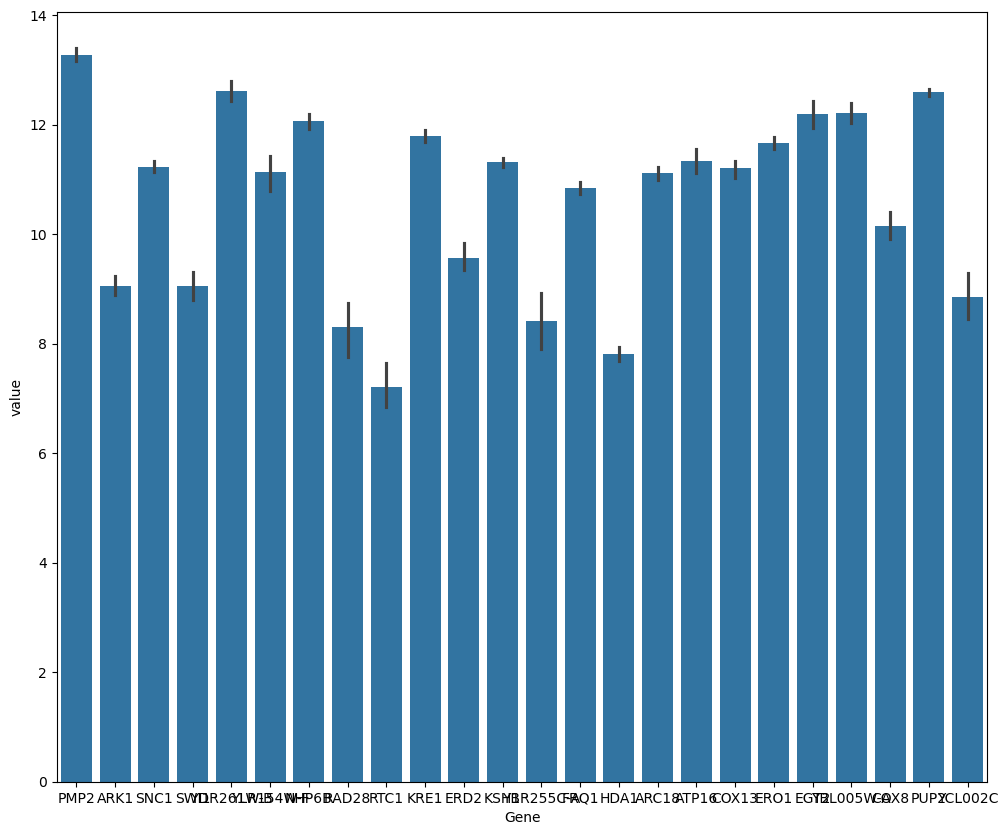

In [55]:
fig = plt.figure(figsize=(12, 10))
sns.barplot(data=unpivot_df, x="Gene", y="value")

Note that the x-tick labels are overlapped with each other. If it doesn't matter what should be placed on x- and y-axes, we can simply set `orient='h'` to adjust the orientation of the bar.

Also, remember to switch the data that used for x- and y-axes.

In addition to changing the bar orientation, we can also change the x label with a more accurate term "TPM".


Text(0.5, 0, 'TPM')

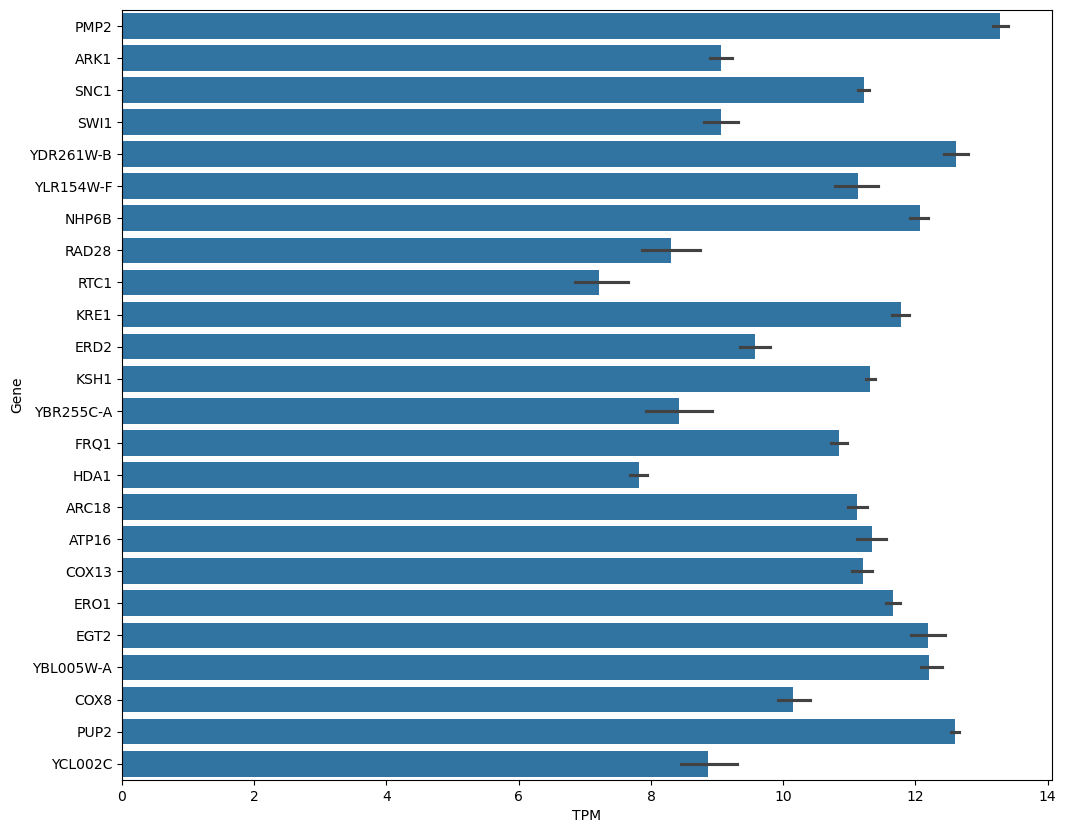

In [56]:
fig = plt.figure(figsize=(12, 10))
sns.barplot(data=unpivot_df, x="value", y="Gene", orient="h")
plt.xlabel("TPM")

If the orientation does matter or you don't like the horizontal layout, you can use this small trick to rotate the x-tick labels.

Here I rotate it by 40 degree.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'PMP2'),
  Text(1, 0, 'ARK1'),
  Text(2, 0, 'SNC1'),
  Text(3, 0, 'SWI1'),
  Text(4, 0, 'YDR261W-B'),
  Text(5, 0, 'YLR154W-F'),
  Text(6, 0, 'NHP6B'),
  Text(7, 0, 'RAD28'),
  Text(8, 0, 'RTC1'),
  Text(9, 0, 'KRE1'),
  Text(10, 0, 'ERD2'),
  Text(11, 0, 'KSH1'),
  Text(12, 0, 'YBR255C-A'),
  Text(13, 0, 'FRQ1'),
  Text(14, 0, 'HDA1'),
  Text(15, 0, 'ARC18'),
  Text(16, 0, 'ATP16'),
  Text(17, 0, 'COX13'),
  Text(18, 0, 'ERO1'),
  Text(19, 0, 'EGT2'),
  Text(20, 0, 'YBL005W-A'),
  Text(21, 0, 'COX8'),
  Text(22, 0, 'PUP2'),
  Text(23, 0, 'YCL002C')])

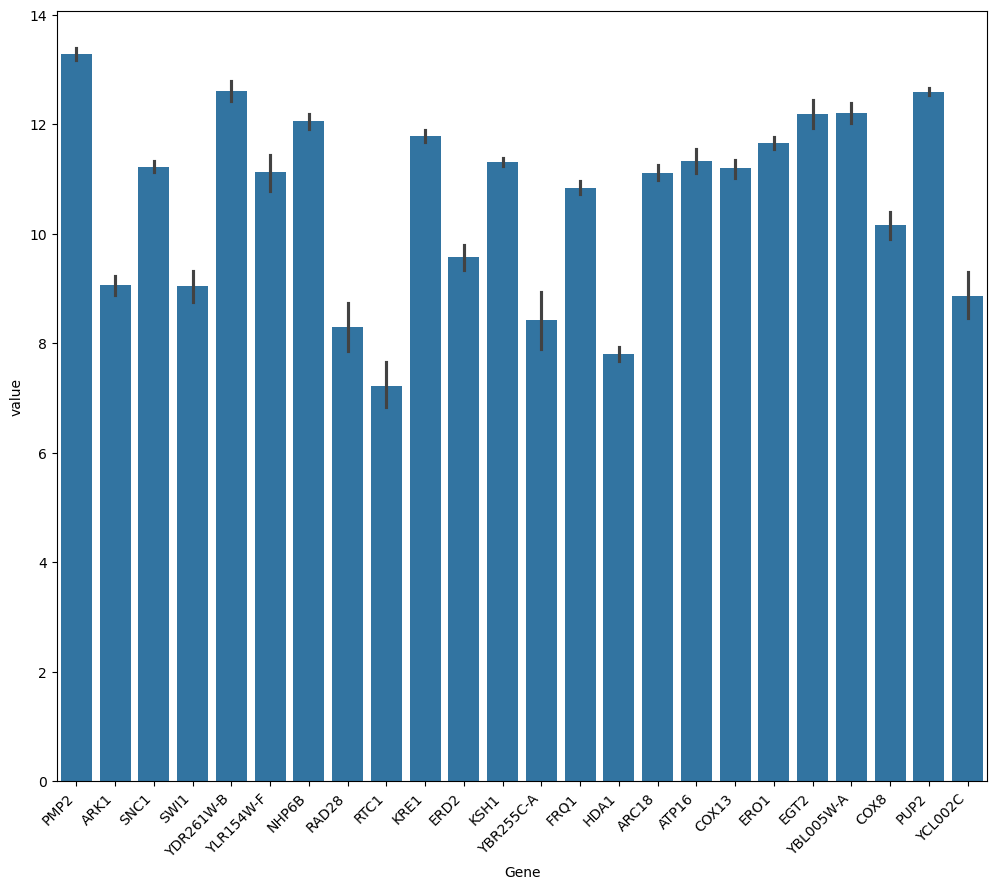

In [61]:
fig = plt.figure(figsize=(12, 10))
ax = sns.barplot(data=unpivot_df, x="Gene", y="value")
plt.xticks(rotation=45, ha="right")

### Boxplot

In the next example, we keep using the expression profile **DataFrame** `combined_df` to practice how to draw a **[boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)**.
Boxplot is more suitable for this specific task than barplot since it give you a hint of the **range** of the expression level of each gene.

`seaborn.boxplot()` function also only takes unpivot DataFrame. We'll simply use the `unpivot_df` we generated for the barplot.

Again, `seaborn.boxplot()` take 3 basic arguments - data, x and y.

- data: DataFrame, array, or list of arrays
- x: names of variables in `data` or vector data to place on x-axis
- y: names of variables in `data` or vector data to place on y-axis


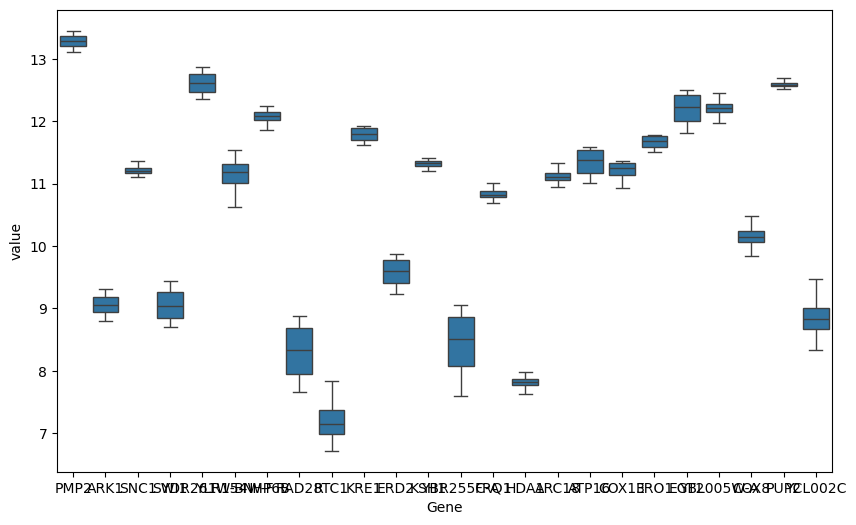

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=unpivot_df, x="Gene", y="value")

At the first glance, it's really messy since the TPM differ a lot for the adjacent genes.
it might be better to sort the genes by their average expression.

One idea is we can go back to the pivot DataFrame and get the mean of each row.
We sort the DataFrame by the average expression level.

In [63]:
combined_df["avg"] = combined_df.iloc[:, 1:].mean(axis=1)
combined_df = combined_df.sort_values("avg")
combined_df

,Gene,sample1,sample2,sample3,sample4,avg
8,RTC1,7.84207,7.213197,7.077,6.72052,7.213197
14,HDA1,7.98176,7.82998,7.62966,7.8138,7.8138
7,RAD28,8.87234,8.6147,8.05457,7.66417,8.301445
12,YBR255C-A,9.06145,8.79874,8.23745,7.60011,8.424438
23,YCL002C,8.86023,9.46633,8.78671,8.32765,8.86023
3,SWI1,9.43545,9.20186,8.88728,8.70331,9.056975
1,ARK1,9.31458,9.13275,8.98824,8.80636,9.060482
10,ERD2,9.86781,9.73894,9.46022,9.22987,9.57421
21,COX8,10.155227,10.488,10.1405,9.83718,10.155227
13,FRQ1,11.0098,10.837567,10.8126,10.6903,10.837567


Next, we perform `df.melt()` again to get a sorted unpivot table.

During performing the `df.melt()`, we can also specify `value_name='TPM'` to correct the column name of the unpivot table.
So we don't have to use `plt.xlabel("TPM")` afterward to fix the x label.

In [64]:
unpivot_df = combined_df.melt(id_vars="Gene", value_vars=["sample1", "sample2", "sample3", "sample4"], value_name="TPM")
unpivot_df

,Gene,variable,TPM
0,RTC1,sample1,7.84207
1,HDA1,sample1,7.98176
2,RAD28,sample1,8.87234
3,YBR255C-A,sample1,9.06145
4,YCL002C,sample1,8.86023
...,...,...,...
91,EGT2,sample4,11.8038
92,YBL005W-A,sample4,11.9672
93,PUP2,sample4,12.5135
94,YDR261W-B,sample4,12.3575


The unpivot table is now sorted by the average expression level of each gene.

We can do the `seaborn.boxplot()` again and use the `plt.xticks()` function to rotate the x-tick labels.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'RTC1'),
  Text(1, 0, 'HDA1'),
  Text(2, 0, 'RAD28'),
  Text(3, 0, 'YBR255C-A'),
  Text(4, 0, 'YCL002C'),
  Text(5, 0, 'SWI1'),
  Text(6, 0, 'ARK1'),
  Text(7, 0, 'ERD2'),
  Text(8, 0, 'COX8'),
  Text(9, 0, 'FRQ1'),
  Text(10, 0, 'ARC18'),
  Text(11, 0, 'YLR154W-F'),
  Text(12, 0, 'COX13'),
  Text(13, 0, 'SNC1'),
  Text(14, 0, 'KSH1'),
  Text(15, 0, 'ATP16'),
  Text(16, 0, 'ERO1'),
  Text(17, 0, 'KRE1'),
  Text(18, 0, 'NHP6B'),
  Text(19, 0, 'EGT2'),
  Text(20, 0, 'YBL005W-A'),
  Text(21, 0, 'PUP2'),
  Text(22, 0, 'YDR261W-B'),
  Text(23, 0, 'PMP2')])

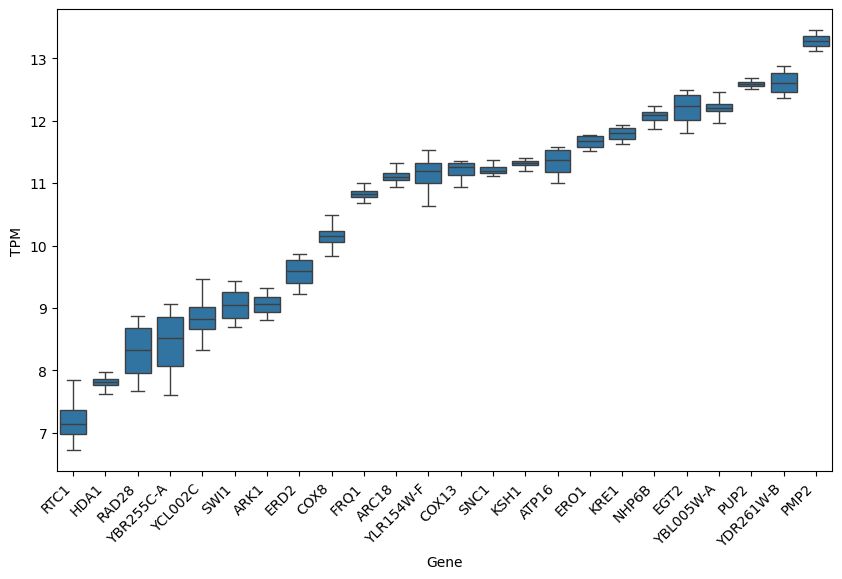

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=unpivot_df, x="Gene", y="TPM")
plt.xticks(rotation=45, ha="right")

### Heatmap

The last part, we're going to use the same expression profile (`combined_df`) to demonstrate how to generate a **[heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)**.

Because the heatmap requires a homogeneous matrix (contains only one type of elements), so we have to transform our heterogeneous DataFrame into homogeneous one.

Let's take a look at the `combined_df`:


In [344]:
combined_df

,Gene,sample1,sample2,sample3,sample4,avg
8,RTC1,7.84207,7.213197,7.077,6.72052,7.213197
14,HDA1,7.98176,7.82998,7.62966,7.8138,7.8138
7,RAD28,8.87234,8.6147,8.05457,7.66417,8.301445
12,YBR255C-A,9.06145,8.79874,8.23745,7.60011,8.424438
23,YCL002C,8.86023,9.46633,8.78671,8.32765,8.86023
3,SWI1,9.43545,9.20186,8.88728,8.70331,9.056975
1,ARK1,9.31458,9.13275,8.98824,8.80636,9.060482
10,ERD2,9.86781,9.73894,9.46022,9.22987,9.57421
21,COX8,10.155227,10.488,10.1405,9.83718,10.155227
13,FRQ1,11.0098,10.837567,10.8126,10.6903,10.837567


As you can see, we only want columns from sample1 to sample4, and we also want to preserve the "Gene" as the y-tick labels.

First, we switch the index column by the column "Gene", and then drop the useless columns. ("Gene", "avg")


In [345]:
combined_df.index = combined_df["Gene"]
combined_df.drop(["Gene", "avg"], axis=1, inplace=True)
combined_df

,sample1,sample2,sample3,sample4
Gene,,,,
RTC1,7.84207,7.213197,7.077,6.72052
HDA1,7.98176,7.82998,7.62966,7.8138
RAD28,8.87234,8.6147,8.05457,7.66417
YBR255C-A,9.06145,8.79874,8.23745,7.60011
YCL002C,8.86023,9.46633,8.78671,8.32765
SWI1,9.43545,9.20186,8.88728,8.70331
ARK1,9.31458,9.13275,8.98824,8.80636
ERD2,9.86781,9.73894,9.46022,9.22987
COX8,10.155227,10.488,10.1405,9.83718


OK, let's try to feed this homogeneous matrix into the `seaborn.heatmap()` function:


TypeError: Image data of dtype object cannot be converted to float

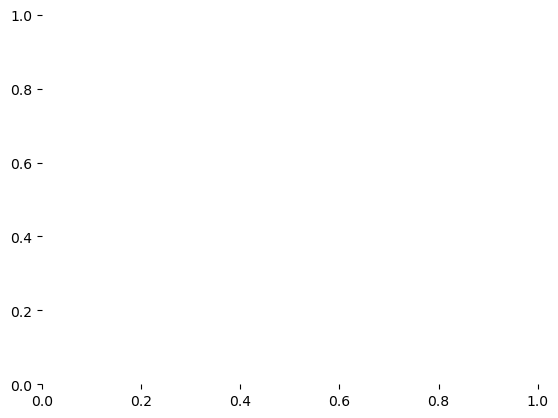

In [346]:
sns.heatmap(data=combined_df)

An error occurred!

According to the error message, we know that the DataFrame type is not _integer_ or _float_ but is _object_. (As shown below)

So we have to go through another step to convert the `dtype` into _float_. We can use `df.astype(float)` to achieve this.


In [347]:
combined_df.dtypes

sample1    object
sample2    object
sample3    object
sample4    object
dtype: object

In [348]:
combined_df = combined_df.astype(float)

In [349]:
combined_df.dtypes

sample1    float64
sample2    float64
sample3    float64
sample4    float64
dtype: object

Now, let's feed the matrix again to `seaborn.heatmap()`:


<Axes: ylabel='Gene'>

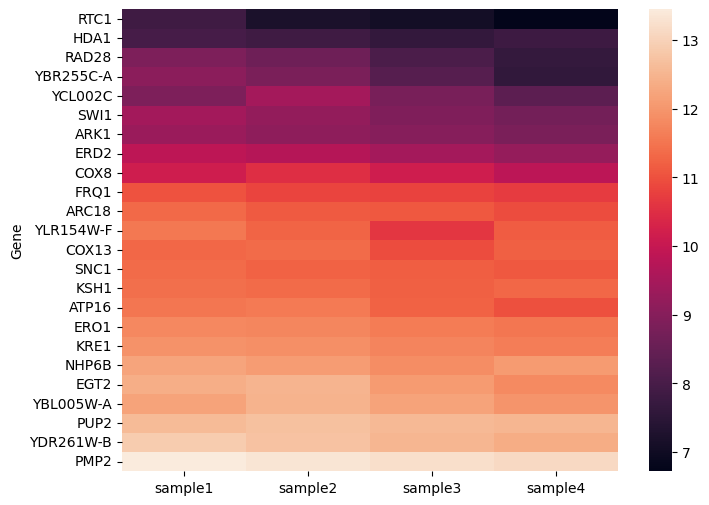

In [350]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(combined_df)

## Cleanup


In [66]:
%rm -f new_file.csv

In [67]:
%rm -f new_file2.csv

In [68]:
%rm -f new_file.tsv